<a href="https://colab.research.google.com/github/fulasho/Predictive-Analytics/blob/main/Clusters1_IBMipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Overview


K-means is one of the most basic clustering algorithms. It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center

In [3]:
 #Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## Let import the necessary libraries

In [4]:
# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [5]:
# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

In [6]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

K-means clustering is one of the most simple clustering algorithms. One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.

# Cluster starting points

Let's start by creating a simple dataset.

In [7]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

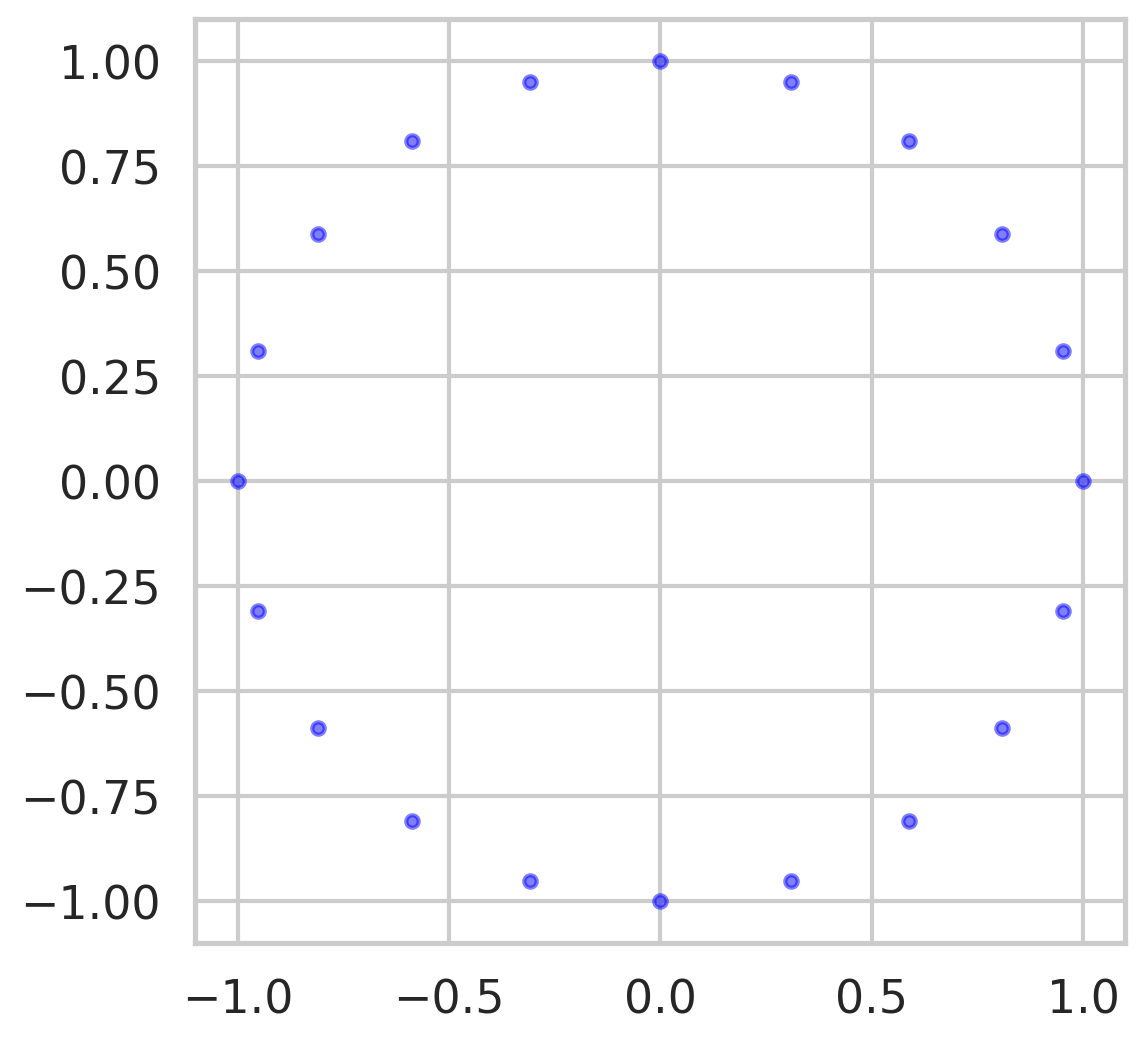

In [8]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

Let's now group this data into two clusters. We will use two different random states to initialize the algorithm. Settign a the random state variable is useful for testing and allows us to seed the randomness (so we get the same results each time).

Clustering with a random state of 10:

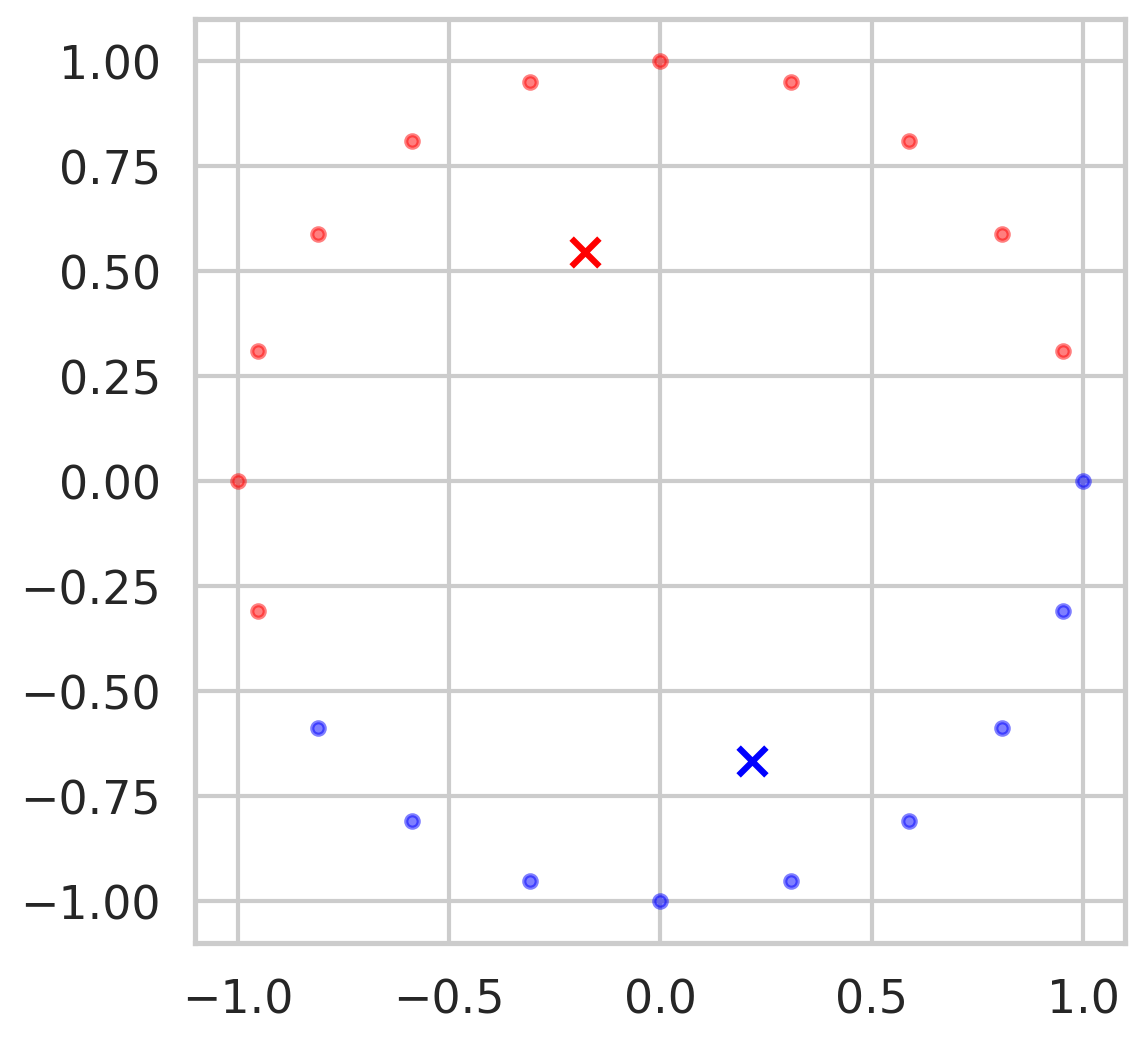

In [9]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

Clustering with a random state of 20:

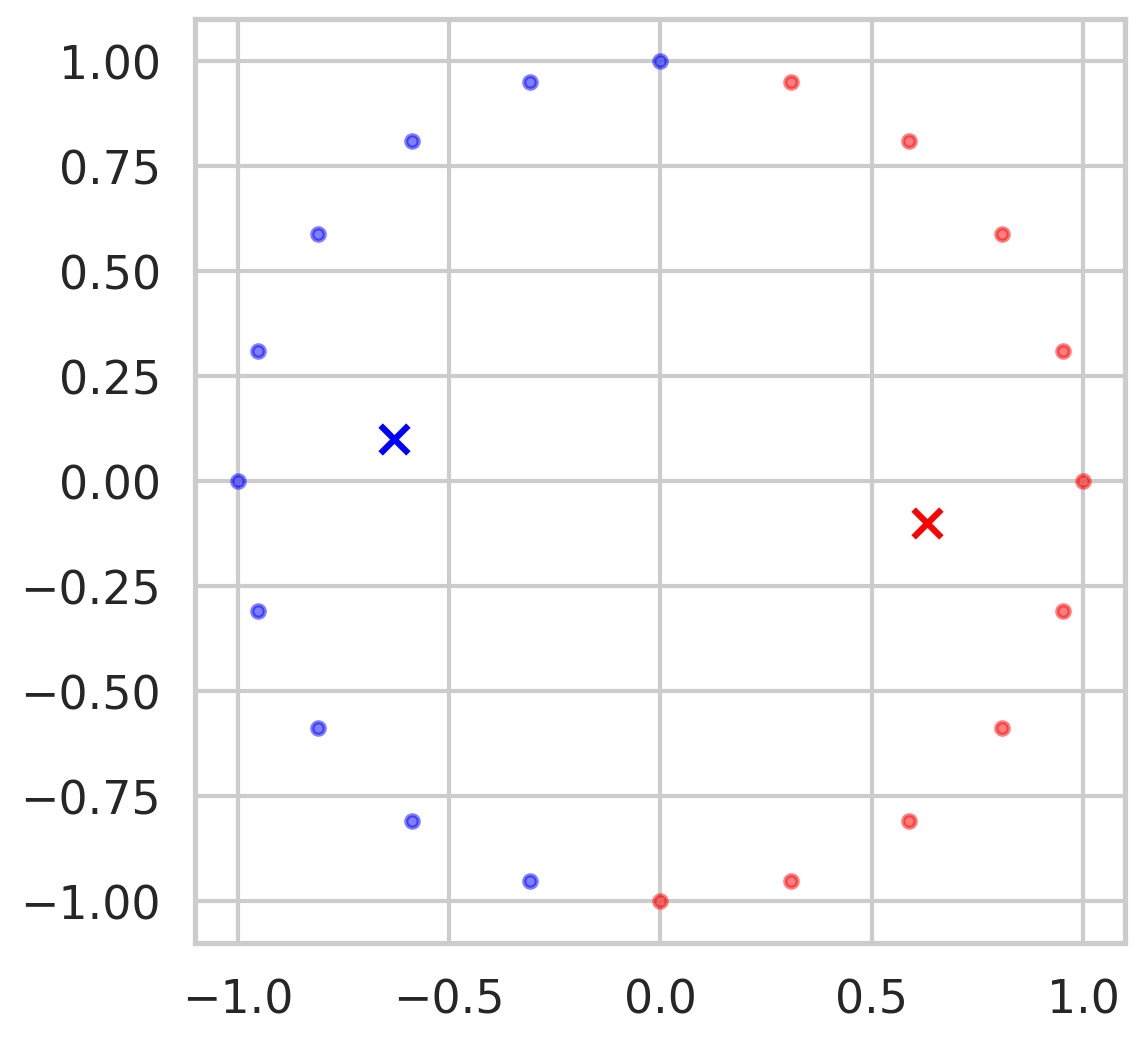

In [10]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

# Question:

Why are the clusters different when we run the K-means twice?

It's because the starting points of the cluster centers have an impact on where the final clusters lie. The starting point of the clusters is controlled by the random state

# Determining optimium number of clusters

Let's create a new dataset that visually consists on a few clusters and try to group them.

In [11]:
from sklearn.datasets import make_blobs

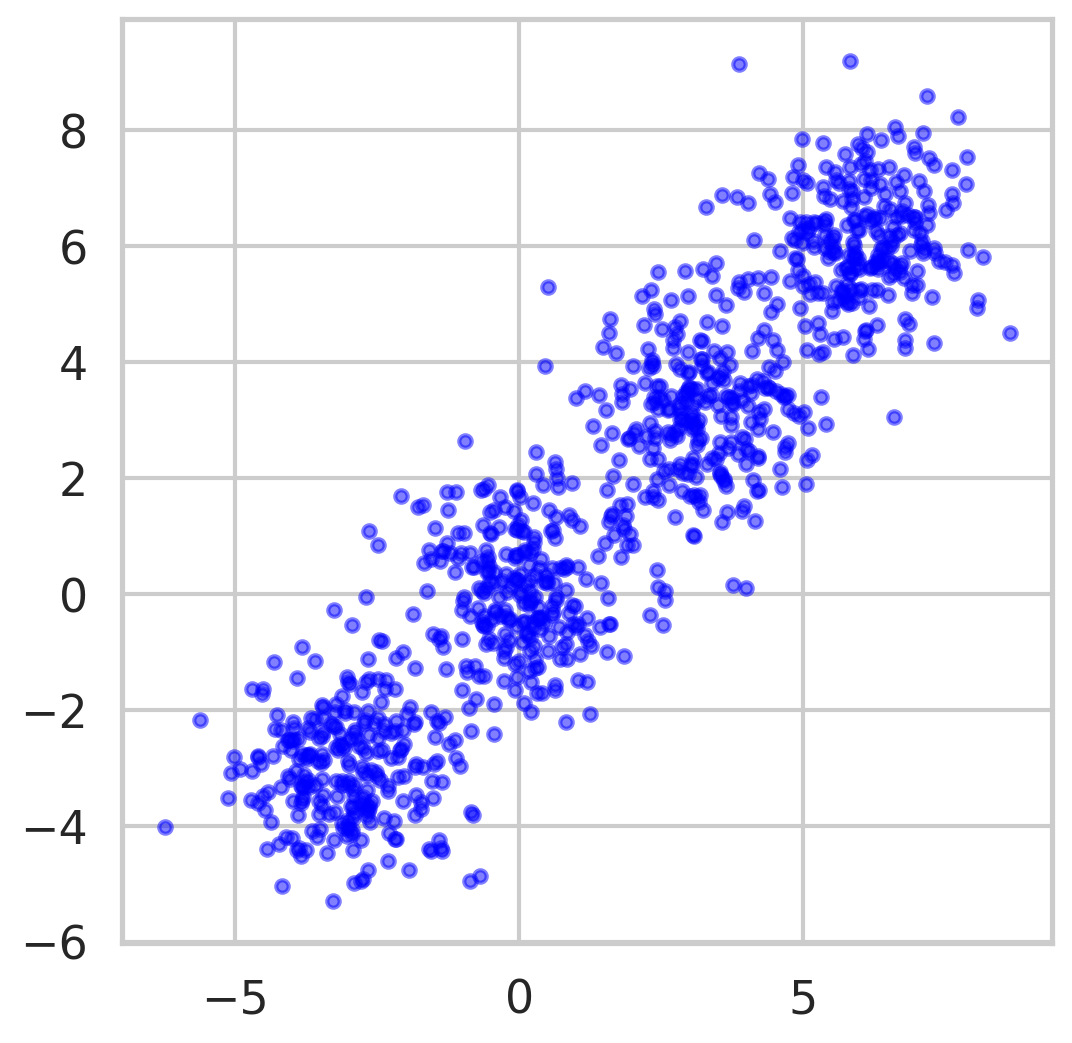

In [12]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

How many clusters do you observe?

We can see from above figure 4 clusters

Let's run K-means with seven clusters.

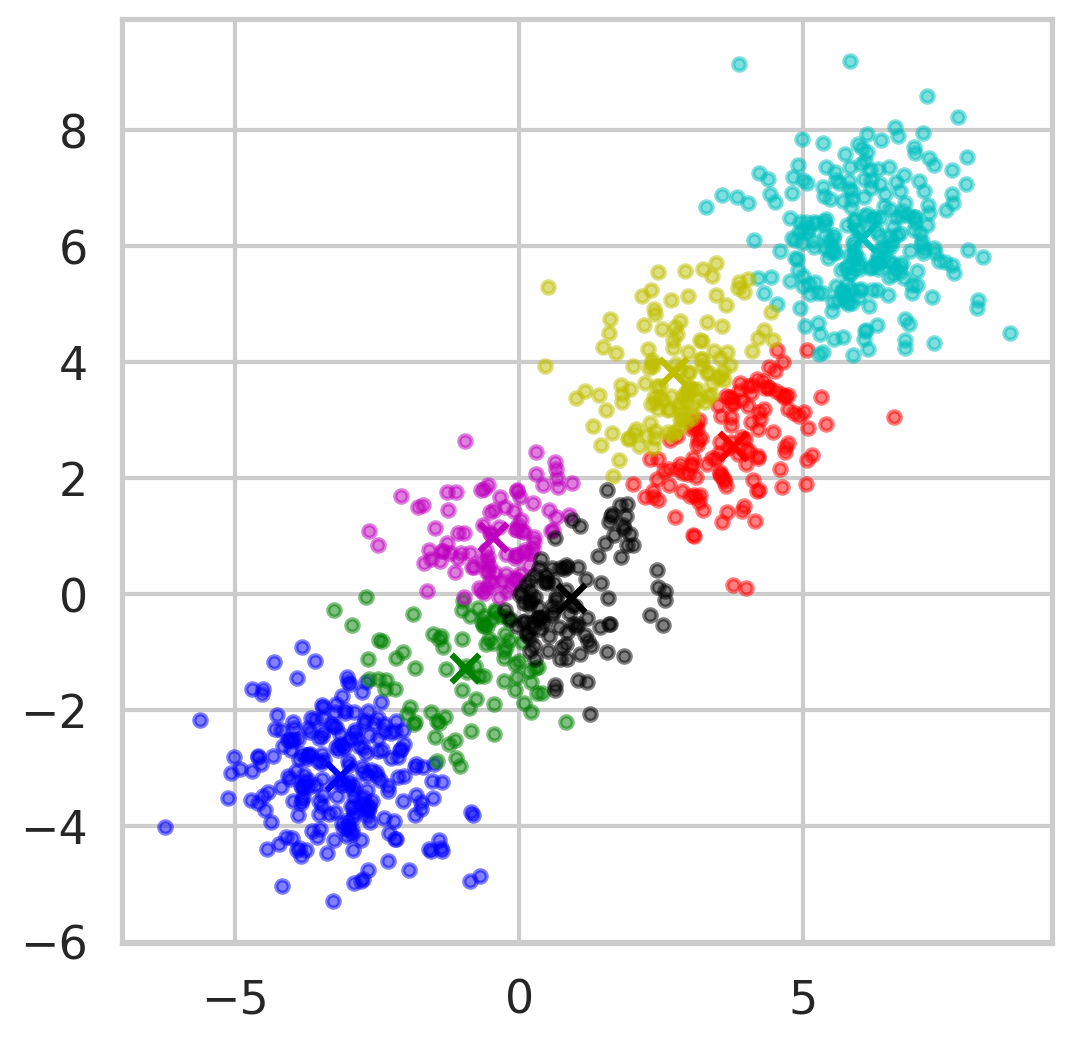

In [13]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

Now let's re-run the algorithm with four clusters.

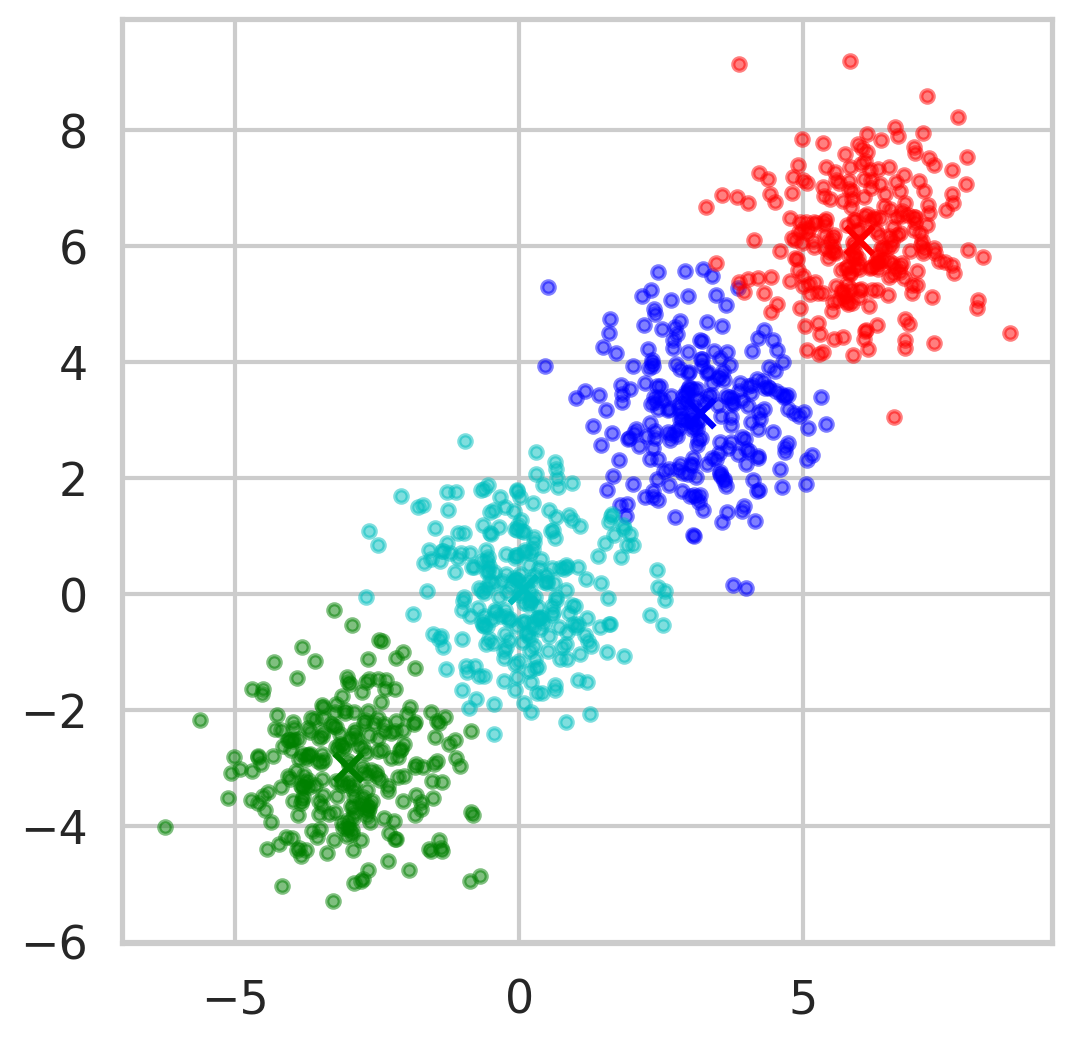

In [14]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

Should we use four or seven clusters?

In this case it may be visually obvious that four clusters is better than seven.

This is because we can easily view the data in two dimensional space.

However, real world data usually has more than two dimensions.

A dataset with a higher dimensional space is hard to visualize.

A way of solving this is to plot the inertia

inertia: (sum of squared error between each point and its cluster center) as a function of the number of clusters.

In [15]:
km.inertia_

1880.1744022775613

# Let write code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters

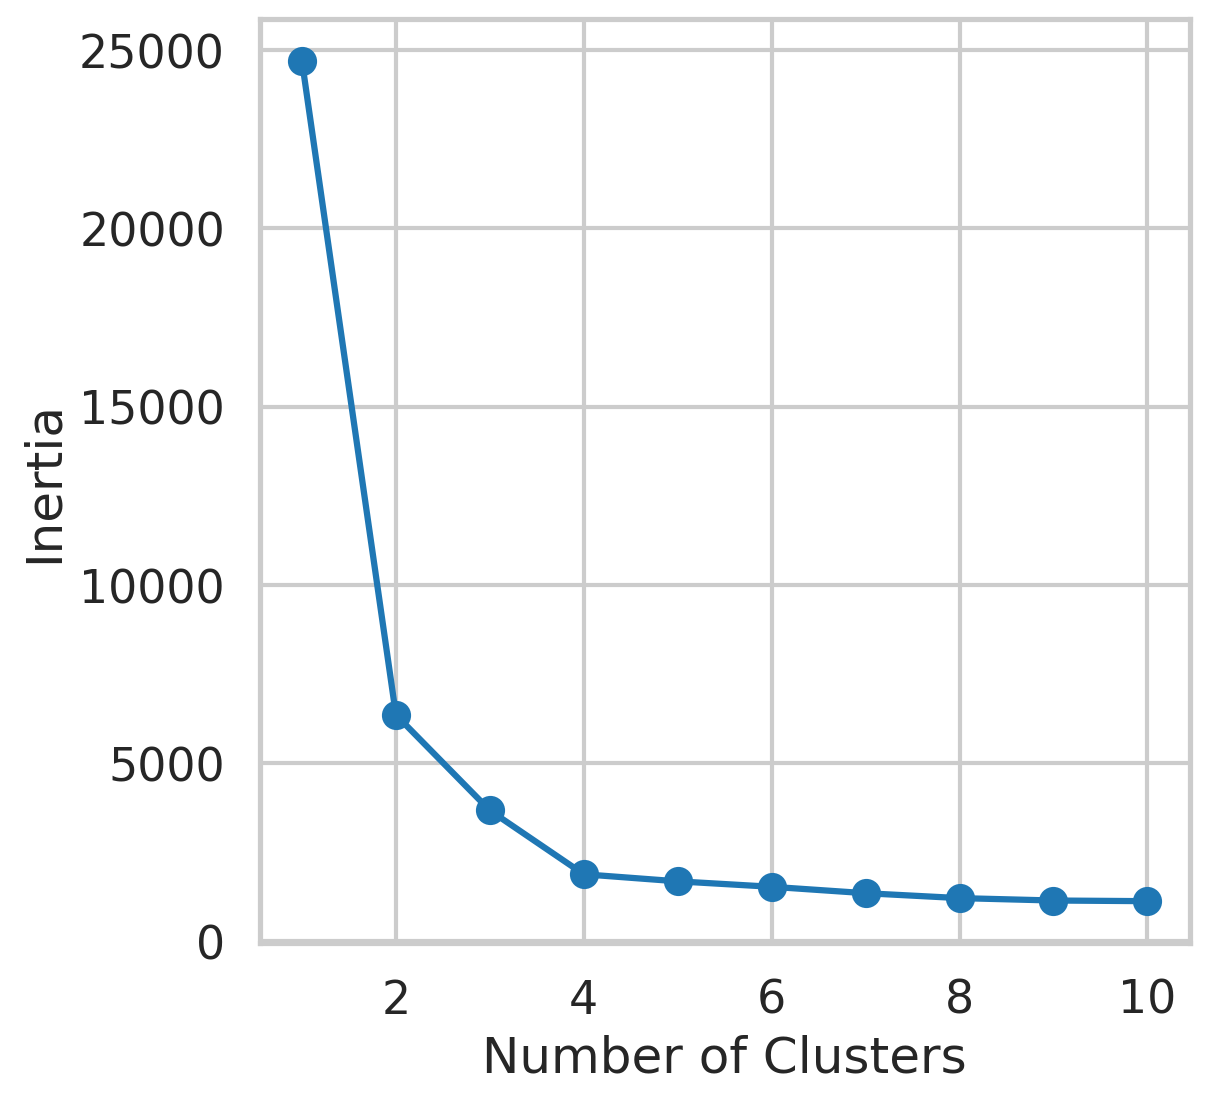

In [16]:
### BEGIN SOLUTION
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

Where does the elbow of the curve occur?

What do you think the inertia would be if you have the same number of clusters and data points?